<a href="https://colab.research.google.com/github/nimamt/machine_learning/blob/master/tf/Projects/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personal Key Indicators of Heart Disease

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

## Data Analysis + Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download kamilpytlak/personal-key-indicators-of-heart-disease

  0% 0.00/3.13M [00:00<?, ?B/s]
100% 3.13M/3.13M [00:00<00:00, 81.9MB/s]


In [4]:
! unzip -o personal-key-indicators-of-heart-disease.zip

Archive:  personal-key-indicators-of-heart-disease.zip
  inflating: heart_2020_cleaned.csv  


In [5]:
df = pd.read_csv('/content/heart_2020_cleaned.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

It is obvious that there is a huge imbalance between the classes.  
Our model tries to fit itself to the whole dataset. Therefore, the model may not predict the minority ('Yes') cases very well. To solve this problem, we have two options: (1) Undersampling (2) Assigning class weights
The second option is preferable because we would not reduce the size of our dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


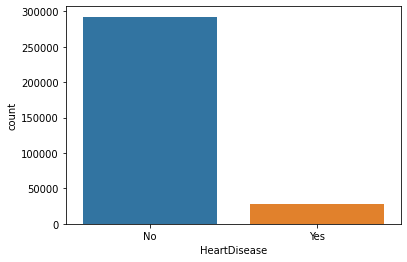

In [7]:
sns.countplot(df['HeartDisease'])

In [8]:
len(df[df['HeartDisease'] == 'Yes'])

27373

In [9]:
df.isnull().sum() / len(df)

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

In [10]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [11]:
df['HeartDisease'] = df['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)

In [12]:
df['Smoking'] = df['Smoking'].apply(lambda x: 1 if x == 'Yes' else 0)

In [13]:
df['AlcoholDrinking'] = df['AlcoholDrinking'].apply(lambda x: 1 if x == 'Yes' else 0)

In [14]:
df['Stroke'] = df['Stroke'].apply(lambda x: 1 if x == 'Yes' else 0)

In [15]:
df['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [16]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'Female' else 0)

In [17]:
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: int(x[0:2]))

In [18]:
df['Race'].value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [19]:
df['Diabetic'] = df['Diabetic'].apply(lambda x: 1 if x == 'Yes' else 0)

In [20]:
df['PhysicalActivity'] = df['PhysicalActivity'].apply(lambda x: 1 if x == 'Yes' else 0)

In [21]:
df['GenHealth'].value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [22]:
def transform_values(x):
  if x == 'Poor':
    return 0
  elif x == 'Fair':
    return 1
  elif x == 'Good':
    return 2
  elif x == 'Very good':
    return 3
  elif x== 'Excellent':
    return 4

df['GenHealth'] = df['GenHealth'].apply(transform_values)

In [23]:
df['SleepTime'] = df['SleepTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [24]:
df['Asthma'] = df['Asthma'].apply(lambda x: 1 if x == 'Yes' else 0)

In [25]:
df['KidneyDisease'] = df['KidneyDisease'].apply(lambda x: 1 if x == 'Yes' else 0)

In [26]:
df['SkinCancer'] = df['SkinCancer'].apply(lambda x: 1 if x == 'Yes' else 0)

In [27]:
df['DiffWalking'] = df['DiffWalking'].apply(lambda x: 1 if x == 'Yes' else 0)

## Preprocessing Part 2

### Method 1

In [28]:
dummies = pd.get_dummies(df['Race'], drop_first=True)

df = pd.concat([df.drop(['Race'], axis=1), dummies], axis=1)

In [29]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Asian,Black,Hispanic,Other,White
0,0,16.60,1,0,0,3.0,30.0,0,1,55,...,3,0,1,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80,...,3,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,65,...,1,0,1,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,1,75,...,2,0,0,0,1,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40,...,3,0,0,0,0,0,0,0,0,1


## Neural Model

In [30]:
X = df.drop('HeartDisease', axis=1).values
y = df['HeartDisease'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=101)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [34]:
X_train.shape[1:]

(21,)

In [35]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))

# class_weights[0] = class_weights[0] / (class_weights[0] + class_weights[1])
# class_weights[1] = class_weights[1] / (class_weights[0] + class_weights[1])

class_weights

{0: 0.546574031345605, 1: 5.867798165137614}

In [36]:
from tensorflow.keras.metrics import Precision,Recall

class F1_Score(tf.keras.metrics.Metric):

    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.f1 = self.add_weight(name='f1', initializer='zeros')
        self.precision_fn = Precision(thresholds=0.5)
        self.recall_fn = Recall(thresholds=0.5)

    def update_state(self, y_true, y_pred, sample_weight=None):
        p = self.precision_fn(y_true, y_pred)
        r = self.recall_fn(y_true, y_pred)
        # since f1 is a variable, we use assign
        self.f1.assign(2 * ((p * r) / (p + r + 1e-6)))

    def result(self):
        return self.f1

    def reset_state(self):
        # we also need to reset the state of the precision and recall objects
        self.precision_fn.reset_state()
        self.recall_fn.reset_state()
        self.f1.assign(0)


In [37]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.5 MB/s 


In [38]:
import tensorflow_addons as tfa

model = Sequential()

model.add(keras.layers.Input(shape=X_train.shape[1:]))

model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=tfa.losses.SigmoidFocalCrossEntropy(), optimizer=opt, metrics=[F1_Score()])

In [39]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=256,
          validation_data=(X_test,y_test), class_weight=class_weights)

Epoch 1/10
1000/1000 [==============================] - 19s 14ms/step - loss: 0.0636 - f1_score: 0.2563 - val_loss: 0.0483 - val_f1_score: 0.3386
Epoch 2/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0575 - f1_score: 0.3240 - val_loss: 0.0496 - val_f1_score: 0.3797
Epoch 3/10
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0564 - f1_score: 0.3351 - val_loss: 0.0453 - val_f1_score: 0.3443
Epoch 4/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0559 - f1_score: 0.3448 - val_loss: 0.0463 - val_f1_score: 0.3713
Epoch 5/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0556 - f1_score: 0.3462 - val_loss: 0.0441 - val_f1_score: 0.3654
Epoch 6/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0555 - f1_score: 0.3504 - val_loss: 0.0481 - val_f1_score: 0.3848
Epoch 7/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0555 - f1_score: 0.3466 - val_loss: 0.0478 - val_f1_

In [40]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=256,
          validation_data=(X_test,y_test), class_weight=class_weights)

Epoch 1/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0552 - f1_score: 0.3542 - val_loss: 0.0440 - val_f1_score: 0.3317
Epoch 2/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0551 - f1_score: 0.3542 - val_loss: 0.0485 - val_f1_score: 0.3694
Epoch 3/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0552 - f1_score: 0.3543 - val_loss: 0.0444 - val_f1_score: 0.3612
Epoch 4/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0551 - f1_score: 0.3558 - val_loss: 0.0455 - val_f1_score: 0.3113
Epoch 5/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0551 - f1_score: 0.3569 - val_loss: 0.0456 - val_f1_score: 0.3635
Epoch 6/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.0550 - f1_score: 0.3570 - val_loss: 0.0462 - val_f1_score: 0.3641
Epoch 7/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0550 - f1_score: 0.3593 - val_loss: 0.0470 - val_f1_score:

In [41]:
model.fit(x=X_train, y=y_train, epochs=5, batch_size=256,
          validation_data=(X_test,y_test), class_weight=class_weights)

Epoch 1/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0550 - f1_score: 0.3546 - val_loss: 0.0470 - val_f1_score: 0.3688
Epoch 2/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0551 - f1_score: 0.3544 - val_loss: 0.0456 - val_f1_score: 0.3605
Epoch 3/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0552 - f1_score: 0.3514 - val_loss: 0.0466 - val_f1_score: 0.3854
Epoch 4/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0549 - f1_score: 0.3572 - val_loss: 0.0436 - val_f1_score: 0.3503
Epoch 5/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0550 - f1_score: 0.3585 - val_loss: 0.0458 - val_f1_score: 0.3322


In [44]:
predictions = model.predict(X_test)

predictions = (model.predict(X_test) > 0.5).astype("int32")

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[56439  1947]
 [ 4075  1498]]


              precision    recall  f1-score   support

           0       0.93      0.97      0.95     58386
           1       0.43      0.27      0.33      5573

    accuracy                           0.91     63959
   macro avg       0.68      0.62      0.64     63959
weighted avg       0.89      0.91      0.90     63959



## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=4,n_estimators=200,class_weight=class_weights)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[42110 16276]
 [ 1235  4338]]


              precision    recall  f1-score   support

           0       0.97      0.72      0.83     58386
           1       0.21      0.78      0.33      5573

    accuracy                           0.73     63959
   macro avg       0.59      0.75      0.58     63959
weighted avg       0.91      0.73      0.78     63959

